In [23]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os



In [24]:
train_dir = "images/train"
val_dir = "images/validation"

train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)


In [25]:
#Load training data

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

Found 28821 images belonging to 7 classes.


In [26]:
#load validation data

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(48,48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"

)

Found 7066 images belonging to 7 classes.


In [28]:
#Define CNN model
from tensorflow.keras.layers import Input, BatchNormalization
model = Sequential()
# Define input shape using an Input layer
model.add(Input(shape=(48, 48, 1)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # 7 emotion classes

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [29]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)

C:\Users\mohan\OneDrive\Desktop\emotion_detector\tfenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
451/451 ━━━━━━━━━━━━━━━━━━━━ 465s 1s/step - accuracy: 0.2135 - loss: 2.2611 - val_accuracy: 0.2525 - val_loss: 1.8050
Epoch 2/15
451/451 ━━━━━━━━━━━━━━━━━━━━ 346s 767ms/step - accuracy: 0.2530 - loss: 1.8085 - val_accuracy: 0.2961 - val_loss: 1.7358
Epoch 3/15
451/451 ━━━━━━━━━━━━━━━━━━━━ 205s 453ms/step - accuracy: 0.2642 - loss: 1.7755 - val_accuracy: 0.2978 - val_loss: 1.7487
Epoch 4/15
451/451 ━━━━━━━━━━━━━━━━━━━━ 205s 454ms/step - accuracy: 0.2933 - loss: 1.7264 - val_accuracy: 0.3694 - val_loss: 1.5822
Epoch 5/15
451/451 ━━━━━━━━━━━━━━━━━━━━ 205s 455ms/step - accuracy: 0.3083 - loss: 1.6806 - val_accuracy: 0.3319 - val_loss: 1.6660
Epoch 6/15
451/451 ━━━━━━━━━━━━━━━━━━━━ 208s 461ms/step - accuracy: 0.3300 - loss: 1.6435 - val_accuracy: 0.4185 - val_loss: 1.5362
Epoch 7/15
451/451 ━━━━━━━━━━━━━━━━━━━━ 206s 457ms/step - accuracy: 0.3483 - loss: 1.6166 - val_accuracy: 0.3951 - val_loss: 1.4783
Epoch 8/15
451/451 ━━━━━━━━━━━━━━━━━━━━ 202s 447ms/step - accuracy: 0.3604 - lo

In [17]:
!pip install matplotlib

  Using cached matplotlib-3.10.3-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp310-cp310-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 18.2 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl (71 kB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ---------------------------------------- 0/6 [pyparsing]
   ------ --------------------------------- 1/6 [kiwisolver]
   ------------- -------------------------- 2/6 [fonttools]
   ----------

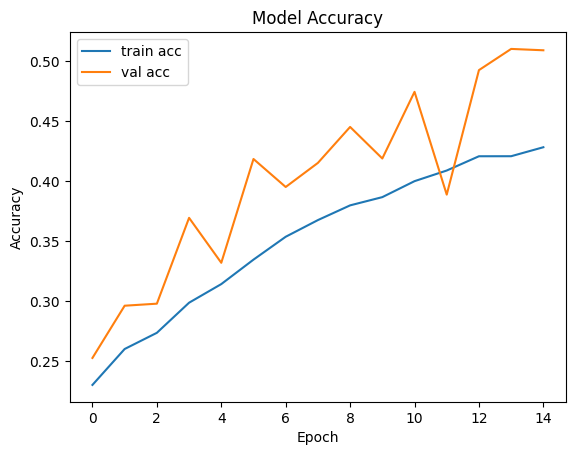

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

In [21]:
model.save("emotion_model.h5")

In [31]:
model.save("emotion_model.keras")